# king country house sales prediction:
   
 

BUSINESS OBJECTIVE:      
                    A real estate company in king country(seattle) wants to know about future sales prices  of houses for upcoming  housesales.
  
ANALYSIS:  
  
 I took previous years king country house sales dataset from kaggle.Performed datacleaning,exploratory data analysis and feature enginneering to extract the  important features from dataset and performed data visualization to present the reports of which attributes highly contribute to the prediction of  house prices. After analysis,the  machine learning model is generated to predict the sales prices using various regression analysis and their  performance is compared. 


1)importing packages and data collection:

In [20]:
### importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [23]:
## reading kc/-house_data
df=pd.read_csv('kc_house_data.csv')
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(21613, 21)

as seen above the dataset contains 21613 rows .(ie) entries and 21 columns .(ie) features

In [24]:
## lets look at  a sample of dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The above code list out first five rows of dataset.Its seen that price column(dependent feature) is the one we are trying to predict and remaining columns are independent features.lets look  deeper into dataset

2)data manipulation:

In [25]:
###  gets info about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Its seen from o/p, there is no missing values in datasets... and also we can remove unrelated features such as id,date,zipcode 

In [46]:
df.columns ### after dropping id,date,zipcode 


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [47]:
## lets see statistical analysis for each features
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


describe command describes each features count,central tendency,quartile ranges.For better understanding we analyse each feature statistical part in detail in visualization.

3) data exploration & visualization:
     
     EDA(exploratory data analysis) include ,
               1.univariate analysis
               2.bi variate and multivariate analysis
               3.missing values and outlier treatement
               4.hypothesis testing
               5.feature engineering
               
               
     In order to perform analysis ,we  list out categorical and numeric variables from dataset.
     
        price ,a numeric variable is dependent variable. Below are independent variables,
     
           1) categorical variables:bedrooms,bathrooms,condition,floors,grade
           2) numeric  variables:sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot_15

I) UNIVARIATE ANALYSIS:
                        Here we analyse each variable seperately.

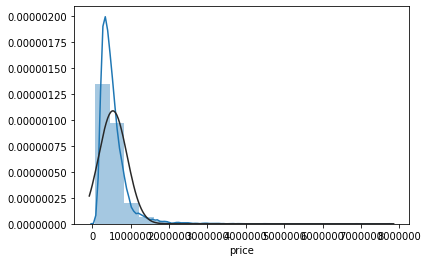

In [4]:
sns.distplot(df['price'],bins=20,fit=norm,kde=True)

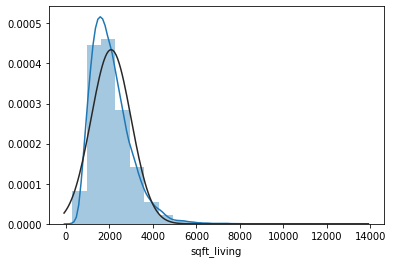

In [5]:

sns.distplot(df['sqft_living'],bins=20,fit=norm,kde=True)

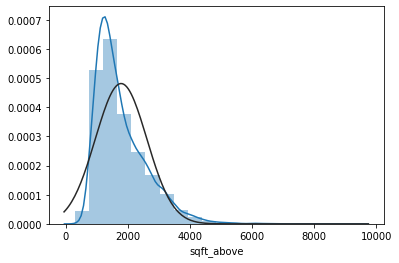

In [7]:
sns.distplot(df['sqft_above'],bins=20,fit=norm,kde=True)


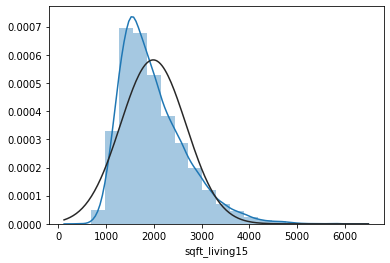

In [8]:

sns.distplot(df['sqft_living15'],bins=20,fit=norm,kde=True)

From univariate analysis, its seen that variables are right skewed and they are not following normal distribution.Next we look at the correlation value of each variable with price(dependent variable).

In [48]:
val=df.corr()['price'].sort_values()
print(val)

long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


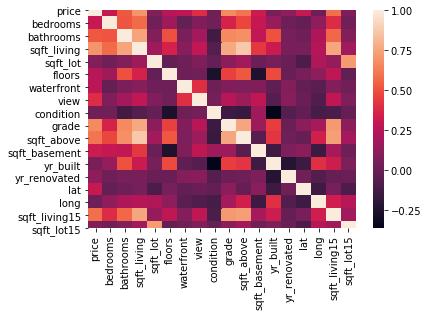

In [49]:
sns.heatmap(df.corr())

from the seaborns heatmap its seen that features  such as sqft_living,sqft_above,grade,sqft_living15,bathrooms etc are highly correlated and we drop the features that are not correlated.

II)BIVARIATE ANALYSIS:
            
                        It involves analysis of dependent variable and independent variables to find out their relationships

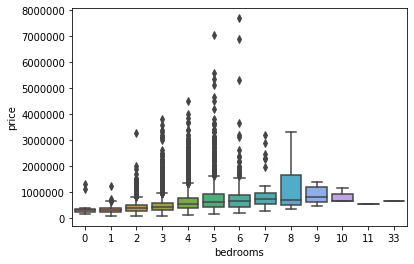

In [10]:
# boxplot is suitable for finding relation b/w categorical and continuous value
sns.boxplot(x='bedrooms',y='price',data=df)

As no.of bedrooms increases ,house price also increases ...similarly we explore relationship  for other features 

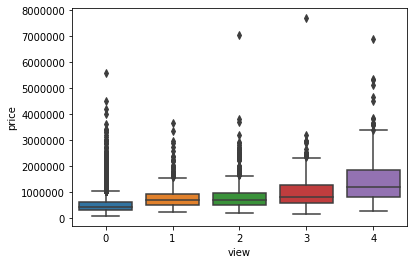

In [11]:
sns.boxplot(x='view',y='price',data=df)

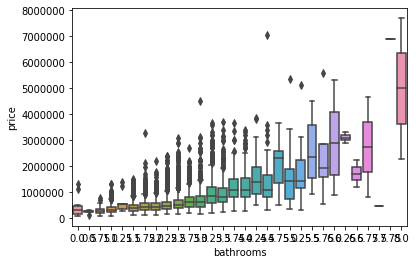

In [12]:

sns.boxplot(x='bathrooms',y='price',data=df)

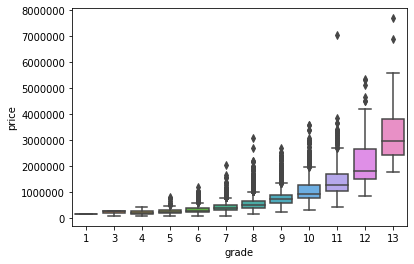

In [13]:
sns.boxplot(x='grade',y='price',data=df)

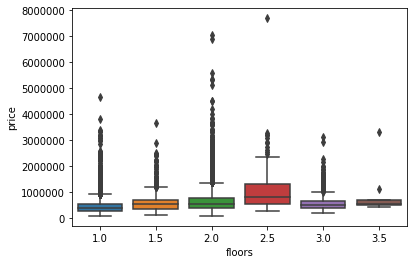

In [14]:
sns.boxplot(x='floors',y='price',data=df)

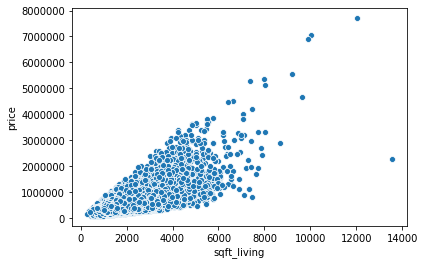

In [15]:
sns.scatterplot(x='sqft_living',y='price',data=df)

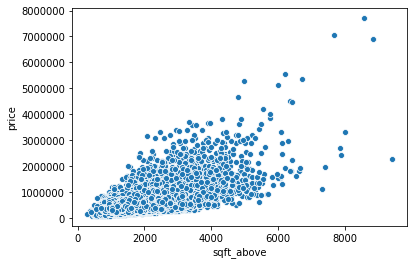

In [23]:


sns.scatterplot(x='sqft_above',y='price',data=df)

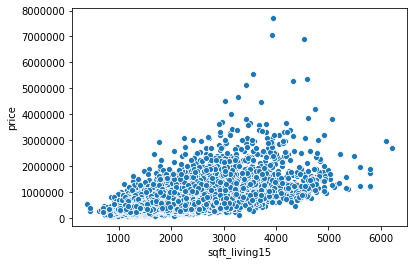

In [24]:

sns.scatterplot(x='sqft_living15',y='price',data=df)

from above scatterplots of sqft_living,sqft_above,sqft_living_15 with prices ,one or two plots are far away from their scatters.This is due to presence of outliers.hence we outlier tranformation to eliminate the effects.

In [ ]:
III)outlier transformation:
                           since its a regresion analysis problem,presence of outliers may lead to incorrect value.Appling
log transformation will eliminate the outliers.
        

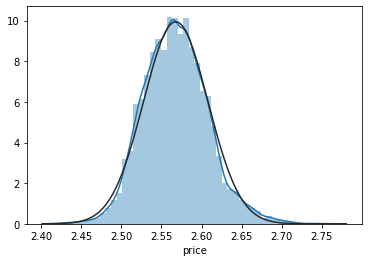

In [10]:
## log transformation
df['price']=np.log(df['price'])
### after  log transformation
sns.distplot(df['price'],fit=norm,kde=True)


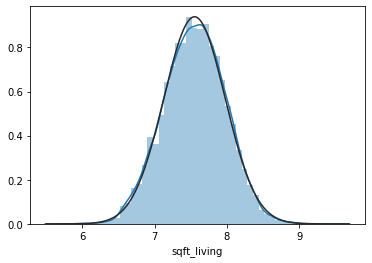

In [11]:
df['sqft_living']=np.log(df['sqft_living'])
### after log tranformation
sns.distplot(df['sqft_living'],fit=norm)

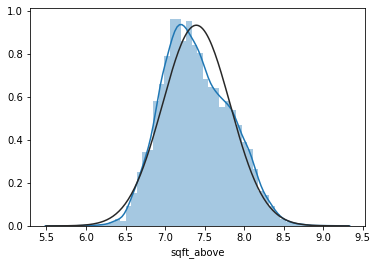

In [12]:
df['sqft_above']=np.log(df['sqft_above'])
### after transformation
sns.distplot(df['sqft_above'],fit=norm)

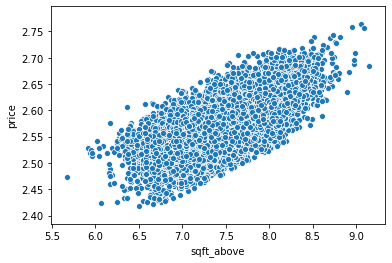

In [13]:
sns.scatterplot(x='sqft_above',y='price',data=df)

 after log transformation ,outlier effects are reduced and hence the scatter plot follows best fit for regression.
 
 IV)MACHINE LEARNING MODEL:

In [56]:

X=df.iloc[:,1:18]### INDEPENDENT FEATURES

y=df.iloc[:,3] ## DEPENDENT FEATURE

## split dataset into train and test

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

### import linear model


from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

print(regressor.intercept_)  

print(regressor.coef_)  

-2.1827872842550278e-11
[ 2.72271386e-13  1.79084525e-12  6.66666667e-01  1.11022302e-16
 -1.09364395e-13  7.13561015e-13 -3.76769013e-14 -6.07774426e-14
  5.01765106e-14  3.33333333e-01  3.33333333e-01 -1.69168065e-15
 -8.17488438e-17  2.46910548e-14 -1.52708295e-13  8.32667268e-17
  2.77555756e-17]


In [57]:

#Prints R Square value
regressor.score(X_train, y_train) 

1.0

In [58]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
bedrooms,2.722714e-13
bathrooms,1.790845e-12
sqft_living,6.666667e-01
sqft_lot,1.110223e-16
floors,-1.093644e-13
waterfront,7.135610e-13
view,-3.767690e-14
condition,-6.077744e-14
grade,5.017651e-14
sqft_above,3.333333e-01


In [59]:
## predicts the value for given test set
y_pred = regressor.predict(X_test) 

### R square value of x_test and y_test
regressor.score(X_test,y_test)

1.0

In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
17384,1430,1430.0
722,4670,4670.0
2680,1440,1440.0
18754,1130,1130.0
14554,3180,3180.0
...,...,...
5427,3090,3090.0
16547,1260,1260.0
4585,1360,1360.0
17762,950,950.0


The above dataframe depicts actual price value and predicted value

In [61]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.explained_variance_score(y_test,y_pred))


Mean Absolute Error: 2.0109789383102927e-12
Mean Squared Error: 2.351644521185378e-23
Root Mean Squared Error: 4.849375754863071e-12
1.0


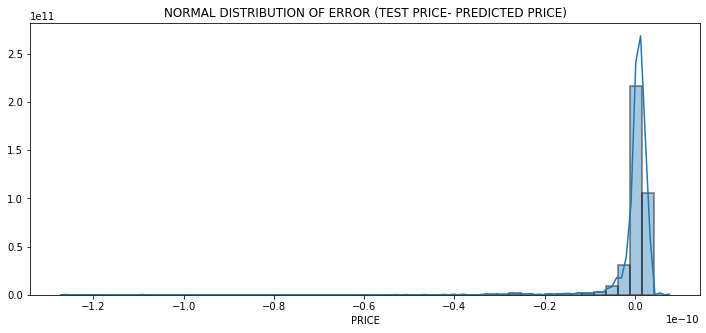

In [62]:
plt.figure(figsize=(12,5))
sns.distplot((y_test-y_pred),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel("PRICE")
plt.title("NORMAL DISTRIBUTION OF ERROR (TEST PRICE- PREDICTED PRICE)")
plt.savefig("distrtibution of error(actual-pred)")


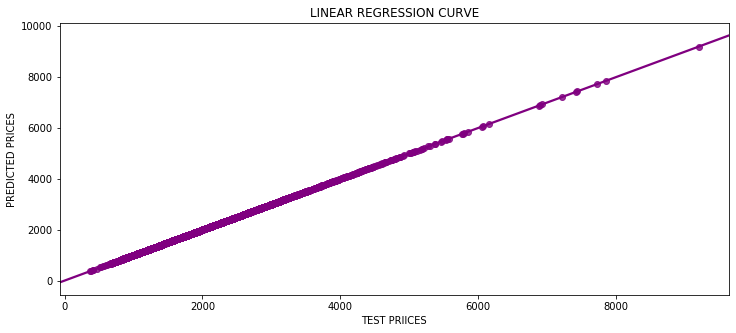

In [63]:
plt.figure(figsize=(12,5))
sns.regplot(y_test,y_pred,df,color='purple')
plt.xlabel("TEST PRIICES")
plt.ylabel("PREDICTED PRICES")
plt.title("LINEAR REGRESSION CURVE")
plt.savefig("regression plot(actual-predicted")


In [ ]:
The above diagrams,first shows the  error distribution of prices and second plot shows the regression line fit for actual and 
predicted prices..

In [65]:

##### randomforest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=80 ,min_samples_leaf=1
                             ,min_samples_split=2,random_state=0)
regr.fit(X_train,y_train)
predict=regr.predict(X_test)

print(regr.score(X_train,y_train))

print(regr.score(X_test,y_test))

0.9998875819122821
0.9999213263229686


In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':predict})  
df 

,Actual,Predicted
17384,1430,1430.0
722,4670,4668.2
2680,1440,1440.0
18754,1130,1130.0
14554,3180,3180.0
...,...,...
5427,3090,3090.0
16547,1260,1260.0
4585,1360,1360.0
17762,950,950.0


In [67]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predict)))
print(metrics.explained_variance_score(y_test,predict))




Mean Absolute Error: 0.41772842933148185
Mean Squared Error: 63.57669761739546
Root Mean Squared Error: 7.973499709499929
0.9999213820005984


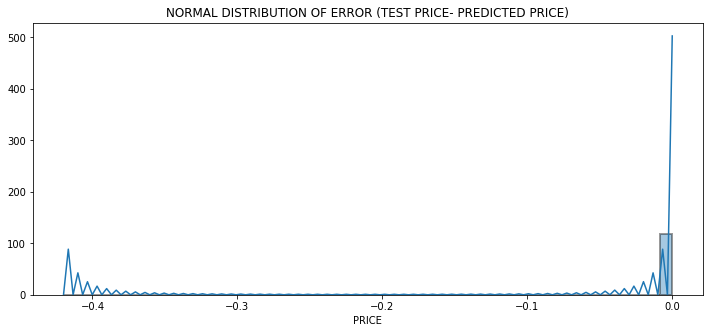

In [45]:

plt.figure(figsize=(12,5))
sns.distplot((y_test-predict),bins=50,hist_kws=dict(edgecolor="k", linewidth=2));
plt.xlabel("PRICE")
plt.title("NORMAL DISTRIBUTION OF ERROR (TEST PRICE- PREDICTED PRICE)")
plt.savefig("distrtibution of error(actual-pred)")

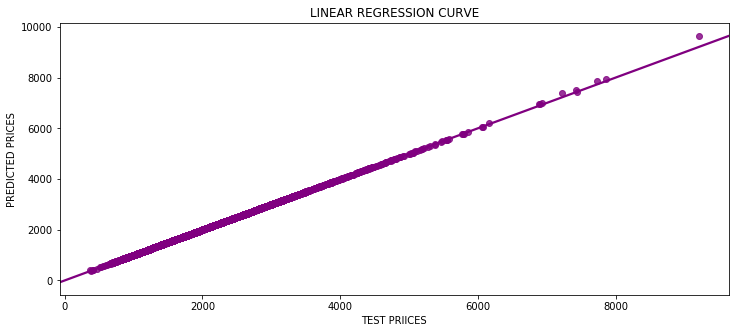

In [73]:
plt.figure(figsize=(12,5))
sns.regplot(y_test,predict,df,color='purple')
plt.xlabel("TEST PRIICES")
plt.ylabel("PREDICTED PRICES")
plt.title("LINEAR REGRESSION CURVE")
plt.savefig("regression plot(actual-predicted")





for random forest regressor,above two plots depict error distribution of prices and regression fit for actual and predicted prices

points to be noted:

        1)since its an regression problem ,we performed various regression analysis machine learning model
        2)we performed correlation to find out the features that are highly noted
        3)features with outlier are transformed using log transformation
        4)linear regression and random forest regressor are performed and their error values are compared
               will perform various regression analysis in future
        